In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
#load modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
from astropy import units as u
from astropy.io import fits
from  matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import copy
import pickle

# import personal code
from model_kit import psd_functions as psd
from model_kit import datafiles as dfx

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

This code uses the surface function data from M2. The fit is based on Jared manually fitting to it.

In [9]:
data_folder = 'zygo_data/Clay/'
sf = np.loadtxt(data_folder+'sf.dat')

# separate them because I am not smart enough
sf_dist = np.zeros((sf.shape[0]))
sf_rms = np.zeros((sf.shape[0]))
for j in range(0, sf.shape[0]):
    sf_dist[j] = sf[j][0]
    sf_rms[j]= sf[j][1]
sf_dist *= u.cm
sf_rms *= u.nm

In [10]:
sffit = np.loadtxt(data_folder+'sffit.dat')

# separate them because I am not smart enough
sffit_dist = np.zeros((sffit.shape[0]))
sffit_rms = np.zeros((sffit.shape[0]))
for j in range(0, sffit.shape[0]):
    sffit_dist[j] = sffit[j][0]
    sffit_rms[j] = sffit[j][1]
sffit_dist *= u.m
sffit_rms *= u.nm

Text(0, 0.5, 'rms [$nm$]')

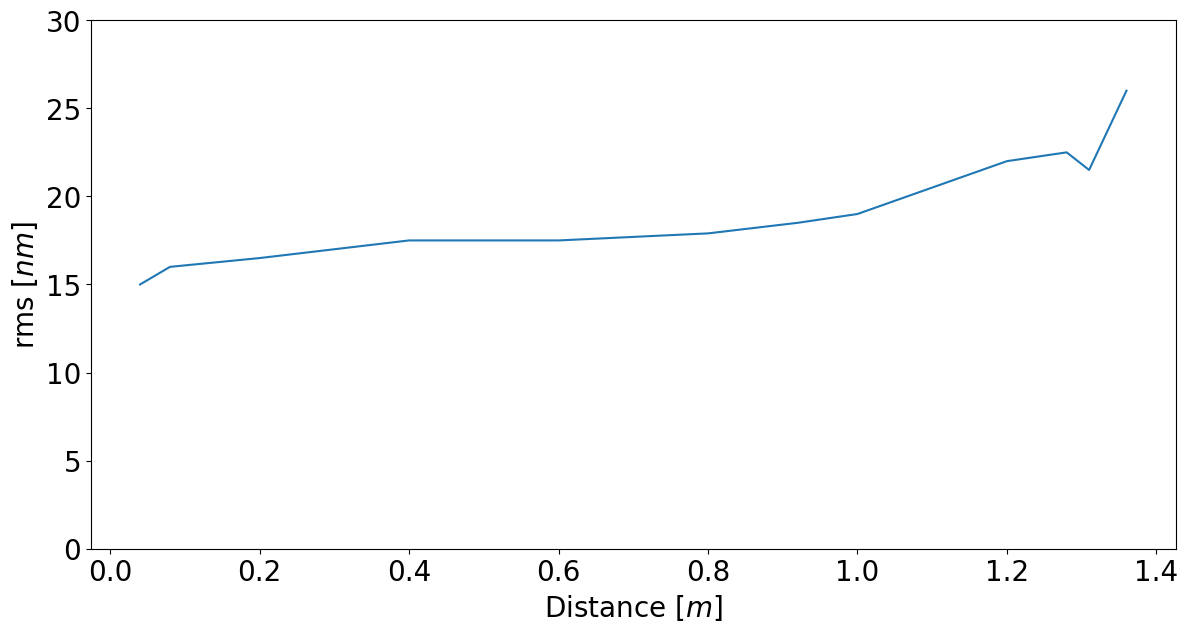

In [17]:
matplotlib.rcParams["font.size"]=20
plt.figure(figsize=[14,7], dpi=100)
plt.plot(sf_dist.to(u.m).value, sf_rms.value)
plt.ylim(top=30, bottom=0)
plt.xlabel('Distance [{0}]'.format(r'$m$'))
plt.ylabel('rms [{0}]'.format(r'$nm$'))

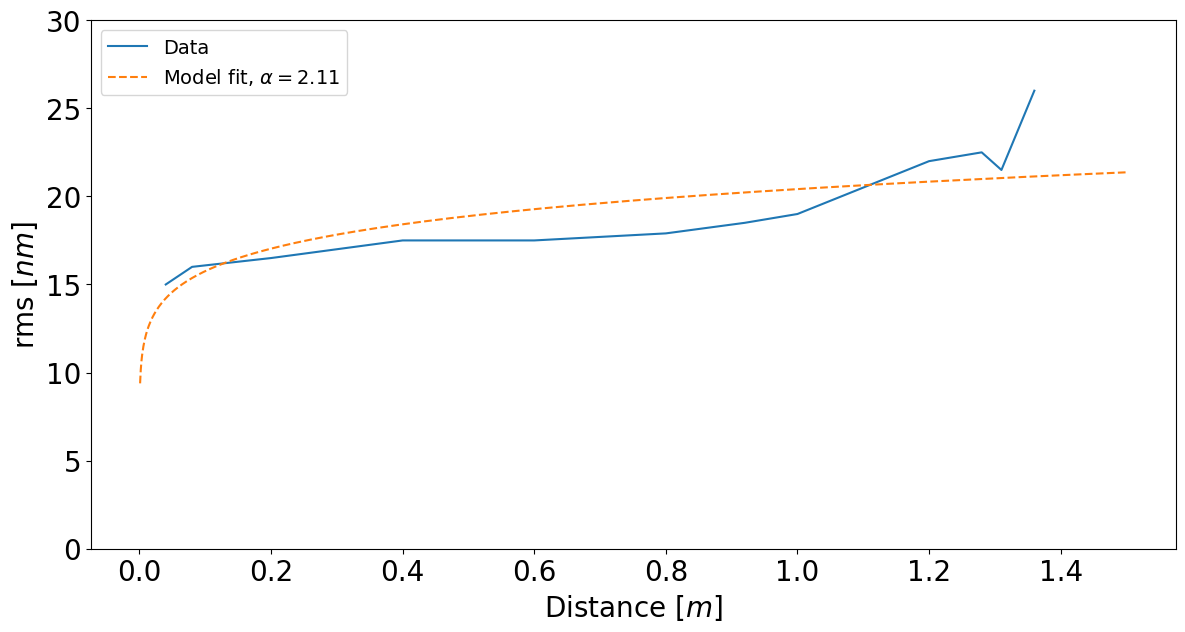

In [21]:
matplotlib.rcParams["font.size"]=20
plt.figure(figsize=[14,7], dpi=100)
plt.plot(sf_dist.to(u.m).value, sf_rms.value, label='Data')
plt.plot(sffit_dist.value, sffit_rms.value, '--', label='Model fit, {0}'.format(r'$\alpha=2.11$'))
plt.ylim(top=30, bottom=0)
plt.xlabel('Distance [{0}]'.format(r'$m$'))
plt.ylabel('rms [{0}]'.format(r'$nm$'))
plt.legend(prop={'size':14})